<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2024/blob/main/06_Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's practice the syntax for linear regression models in Python using the same data from the packet.

In [18]:
import pandas as pd
ad_data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')
ad_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Creating an OLS linear regression model

In [19]:
import statsmodels.formula.api as smf # Import a library to help us create linear regression models

Let's create a model that predicts sales based on newspaper advertising:

* smf.ols() - Creates a new Ordinary Least Squares linear regression model
  * data - The dataframe with our data
  * formula - Formula illustrating the regression that we want to run
* We always need to add .fit() after ols() -- this does the work of actually finding the best fit

**Formula**
* DEPENDENT VARIABLE ~ INDEPENDENT VARIABLE(s)
* We can directly use column names inside of the formula
* The entire formula is a string

In [20]:
model = smf.ols(data=ad_data, formula='sales ~ newspaper').fit()

We can get the output from the regression analysis and lots of useful metrics by running the *summary()* method of our model

## Interpreting regression results

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 09 Jul 2024   Prob (F-statistic):            0.00115
Time:                        23:20:35   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Our p-value for newspaper is 0.001
  * Interpretation: Result is statistically significant (with alpha .05, .01, etc)
* 95% of the time, our slope will fall between 0.022 and 0.087
  * Interpretation: For every \$1000 extra in newspaper advertising, we are 95% confident that there will be an increase between \$22 and \$87 in sales
  * --> We can reject the null hypothesis
* R squared is 0.052
  * We are only explaining 5.2% of the variability present with this model
* More output that we recognize: AIC, BIC, adjusted R^2
* Prob (F-statistic) - Probability of getting this model or more extreme if all coefficients were actually 0 (combined hypothesis test for all variables)
  * Tests multiple vars at once

Let's create a scatter plot with the line of best fit:

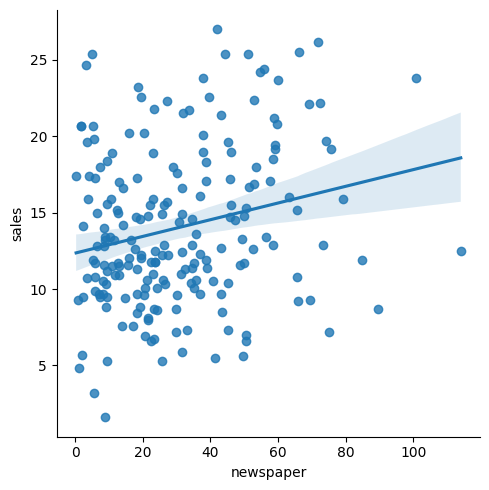

In [22]:
import seaborn as sns
sns.lmplot(data=ad_data, x='newspaper', y='sales')

## Checking assumptions, diagnostic plots

In [23]:
# Get some code that helps us make the diagnostic plots
%pip install git+https://github.com/tb-harris/diagnostics.git

  Cloning https://github.com/tb-harris/diagnostics.git to /tmp/pip-req-build-0d6yiv58
  Running command git clone --filter=blob:none --quiet https://github.com/tb-harris/diagnostics.git /tmp/pip-req-build-0d6yiv58
  Resolved https://github.com/tb-harris/diagnostics.git to commit 63e7ed899813d387d104118e3b35d435b398c0df
  Preparing metadata (setup.py) ... done
  Created wheel for diagnostics: filename=diagnostics-0.1-py3-none-any.whl size=4725 sha256=3662994006cb02989ed1e4f0e066e6bb330c3b98627a9172ee11c7fdfd78679e
  Stored in directory: /tmp/pip-ephem-wheel-cache-p32cv319/wheels/21/cb/88/c66692261515f980dd7feb94432c509c089d0277175742724f
Successfully built diagnostics


In [24]:
from diagnostics import LinearRegDiagnostic

In [25]:
# Create a new object to handle creating the diagnostic plots using our model
diag_plotter = LinearRegDiagnostic(model)

### Our assumptions
* Linear -> Residuals vs fitted
* Independent
* Normal (Errors are normally distributed) -> QQ Plot
* Equal standard deviation of errors -> Scale-Location Plot
* Random
* Outliers -> Residuals vs Leverage

### Residuals vs Fitted
Is a line a good fit for the relationship between the two variables?

**LOOKING FOR**: Horizontal line

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

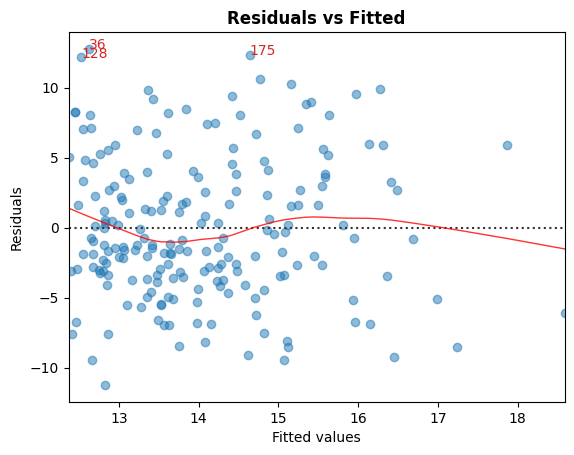

In [26]:
diag_plotter.residual_plot()

* Fitted values: y predictions
* Residuals: Difference between observed and predicted

Line is fairly flat -> no issues here

In [27]:
# We can see in our graph that 36 is one of the highest residual values
# We can access that individual row:
ad_data.iloc[36, :] # iloc - Access by ordered index (0, 1, 2 ...) - will be needed when we work with cells

Unnamed: 0     37.0
TV            266.9
radio          43.8
newspaper       5.0
sales          25.4
Name: 36, dtype: float64

### QQ Plot
Are the residuals normally distributed?

**LOOKING FOR**: Points aligned with line

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

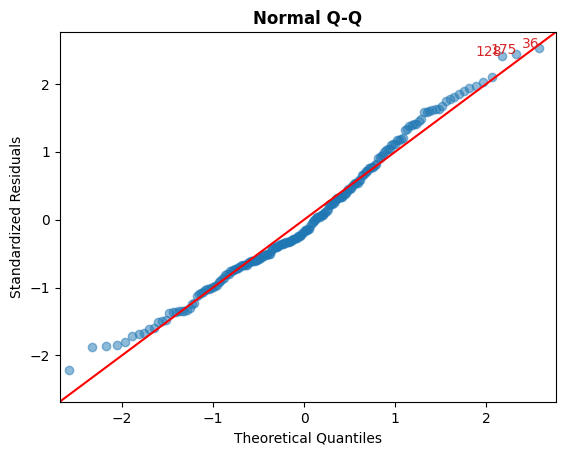

In [28]:
diag_plotter.qq_plot()

* Pretty good
* Small deviations at the ends

### Scale-Location
"Zooms in" our residuals vs fitted. Across the fitted values, is the standard deviation of the residuals similar?

**LOOKING FOR**: Horizontal line

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

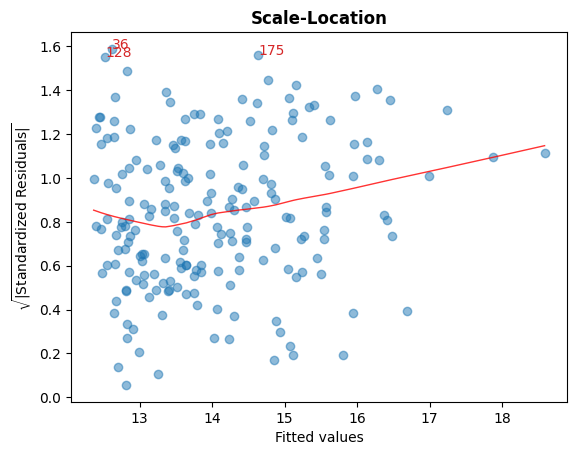

In [29]:
diag_plotter.scale_location_plot()

Not totally horizontal, but not that bad for the small number of data points we have -- looks consistent for the area where we have the most data

### Residuals vs Leverage


What points might have a strong effect on the slope of the regression line (high leverage + outlier)?

**LOOKING FOR**:
* Too many residuals past 3 or -3 -> Normality issues
* High Cook's distance (dotted line) -> Too much influence on regression line

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

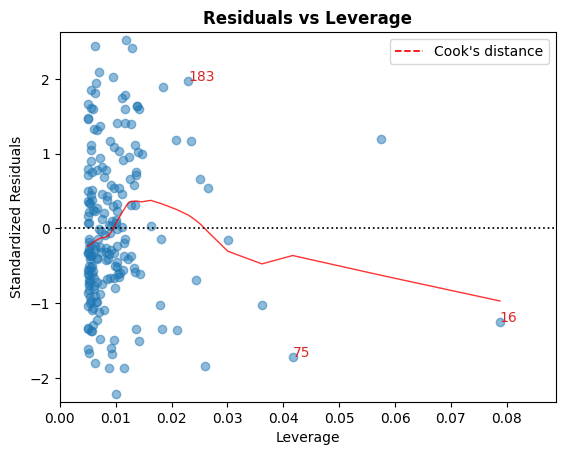

In [30]:
diag_plotter.leverage_plot()

## Multiple Regression
Table 3.4 in the "Multiple Regression!" packet

In [31]:
mult_model = smf.ols(data=ad_data, formula='sales ~ TV + radio + newspaper').fit()

In [32]:
# Single regression model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 09 Jul 2024   Prob (F-statistic):            0.00115
Time:                        23:21:03   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.58e-96
Time:                        23:21:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Adjusted R squared went up; AIC, BIC went down
* We've gone from explaining 5% of our variation to 90%

### Variance Inflation Factor and Correlation Matrix


How much harder is it to get statistically significant results due to each variable?

**LOOKING FOR**: Any VIF over 5 points to variables that may be too correlated with other variables to keep in the model.

In [34]:
# We need to create a new diagnostics object since we're working with a new model
diag_mult = LinearRegDiagnostic(mult_model)

In [35]:
diag_mult.vif_table()

,Features,VIF Factor
1,TV,1.00
2,radio,1.14
3,newspaper,1.15
0,Intercept,6.85


Our VIF table doesn't raise any red flags, but based on the high p value for newspaper we might want to try removing it.

--> Also might be a good idea to make a correlation matrix

### Correlation Matrix
Useful to look at when we have a high p-value --> potentially want to remove variables

**LOOKING FOR**: Independent variables that are highly correlated (but one is more strongly correlated with outcome)

In [36]:
ad_data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Radio and newspaper are highly correlated with each other; radio is more correlated with sales --> effect of newspaper may be more related to radio being high.

We can create a heatmap to help visualize the correlation matrix:

<Axes: >

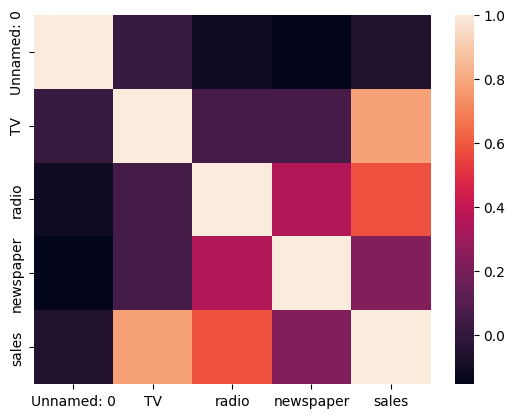

In [37]:
import seaborn as sns
sns.heatmap(ad_data.corr())

#### Morphology Correlation Matrix
**This can be really interesting to look at for our morphology dataset!**



In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

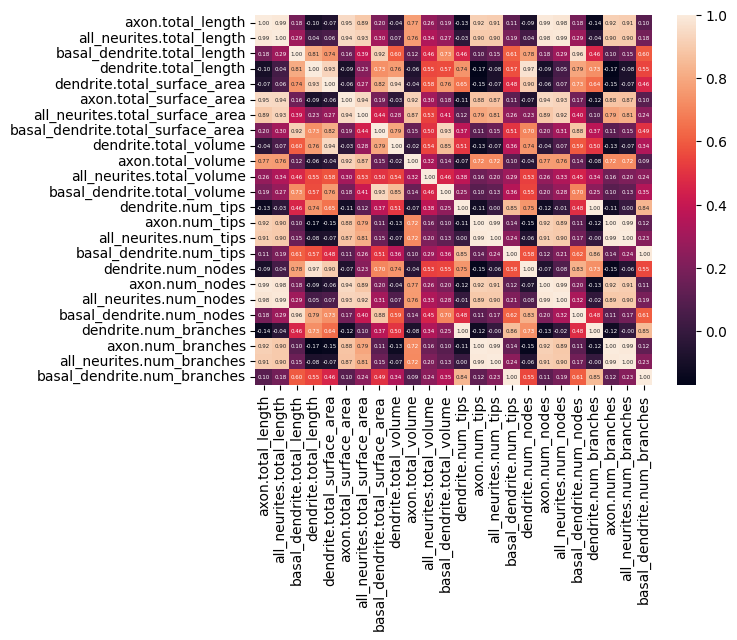

In [54]:
# Load morphology data for all cells
all_morph_data = pd.read_hdf('/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/morph_data.hdf5.lz4')

sns.heatmap(all_morph_data.corr(), annot=True, fmt=".2f", annot_kws={"fontsize":4})

### Interaction Term
Let's try accounting for the interaction between our TV and radio variables.

In [39]:
interaction_model = smf.ols(data=ad_data, formula='sales ~ TV + radio + TV*radio').fit()

In [40]:
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):          6.68e-146
Time:                        23:21:05   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Eliminating newspaper and adding in our interaction term increased our adjusted R^2, decreased AIC and BIC, good p-values --> we've arrived at a pretty good model!